## The data in this notebook reflects the ELT activity from March 1st to March 29th, 2023

In [8]:
# importing necessary pacakages for data analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# Importing Data

In [2]:
job_schedule_df = pd.read_csv('./ODIN_Jobs_Schedule.csv')       # scheduled jobs on Odin
elt_calendar_df = pd.read_csv('./Odin_ETLmarch_2023_03_29.csv') # all ELTs for 3/23 according to table in Odin.SL

# Transforming datetime columns to readable format 
job_schedule_df['Last Run'] = job_schedule_df['Last Run'].astype('datetime64')
job_schedule_df['Next Run'] = job_schedule_df['Next Run'].astype('datetime64')
elt_calendar_df['Start_DateTime'] = elt_calendar_df['Start_DateTime'].astype('datetime64')
elt_calendar_df['End_DateTime'] = elt_calendar_df['End_DateTime'].astype('datetime64')

# Getting to know the structure of the two tables

In [3]:
# Example of tables
print('Agent Jobs in Odin')
display(job_schedule_df.head(5))
print('--------------------------------------------------------------------')
print('ETL runs in Odin')
display(elt_calendar_df.head(5))

Agent Jobs in Odin


,Name,Enabeled,Status,Last Run Outcome,Last Run,Next Run,Category,Runnable,Scheduled,CategoryID
0,U BW_BI - hst.user_local,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0
1,U BW_BI - hst.lot_loc,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0
2,U BW_BI - hst.do_hdr,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0
3,U BW_BI - hst.UserNames,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0
4,U BW_BI - hst.UserEmail,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0


--------------------------------------------------------------------
ETL runs in Odin


,run_date,ETL_name,Start_DateTime,End_DateTime,run_duration,Duration,LastRunStatus
0,3/29/2023,BW_BI - Planning View Detail - BW_BI,2023-03-29 04:55:00,2023-03-29 04:55:00,4,"0 Day(s), 0 Hour(s), 0 Minute(s), 4 Second(s).",Successful
1,3/29/2023,BW_BI - Planning View Detail - BW_BI,2023-03-29 04:55:00,2023-03-29 04:55:00,4,"0 Day(s), 0 Hour(s), 0 Minute(s), 4 Second(s).",Successful
2,3/29/2023,BW_BI - Invoice_Items_View - BW_BI,2023-03-29 04:45:00,2023-03-29 04:59:00,1427,"0 Day(s), 0 Hour(s), 23 Minute(s), 47 Second(s).",Successful
3,3/29/2023,BW_BI - Invoice_Items_View - BW_BI,2023-03-29 04:45:00,2023-03-29 04:59:00,1427,"0 Day(s), 0 Hour(s), 23 Minute(s), 47 Second(s).",Successful
4,3/29/2023,BW_BI - CFY poitem - SL,2023-03-29 04:35:00,2023-03-29 04:35:00,29,"0 Day(s), 0 Hour(s), 0 Minute(s), 29 Second(s).",Successful


In [4]:
# Filtering for jobs pulling from Nestor

    # From list of Agent Jobs
jobs_to_nestor = job_schedule_df[job_schedule_df['Name'].str.contains('NESTOR|Nestor|nestor')]
    # From ELT table in Odin.SL
elt_to_nestor = elt_calendar_df[elt_calendar_df['ETL_name'].str.contains('NESTOR|Nestor|nestor')]

# These are the scheduled jobs that run more than once per day

In [5]:
# Filtering for jobs that run > 1/day
jobs_multiple_times_per_day = jobs_to_nestor[jobs_to_nestor['Last Run'].dt.date == jobs_to_nestor['Next Run'].dt.date]
jobs_multiple_times_per_day.style

,Name,Enabeled,Status,Last Run Outcome,Last Run,Next Run,Category,Runnable,Scheduled,CategoryID
11,BW_BI - hst.coitem - NESTOR,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0
12,BW_BI - hst.frzcost - NESTOR,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0
13,BW_BI - hst.currate - NESTOR,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0
14,BW_BI - hst.item_ty - NESTOR,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0
17,BW_BI - hst.distacct - NESTOR,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0
18,BW_BI - hst.co - NESTOR,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0
20,BW_BI - hst.customer - NESTOR,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0
22,BW_BI - hst.AccountAuthorizations - NESTOR,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0
24,BW_BI - hst.endtype - NESTOR,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0
28,BW_BI - hst.itemprice - NESTOR,yes,Idle,Succeeded,2023-03-29 13:00:00,2023-03-29 13:30:00,[Uncategorized (Local)],yes,yes,0


## Example Schedule for an ETL being scheduled to run multiple times a day
### ELT Name: BW_BI-hst.frzcost-NESTOR

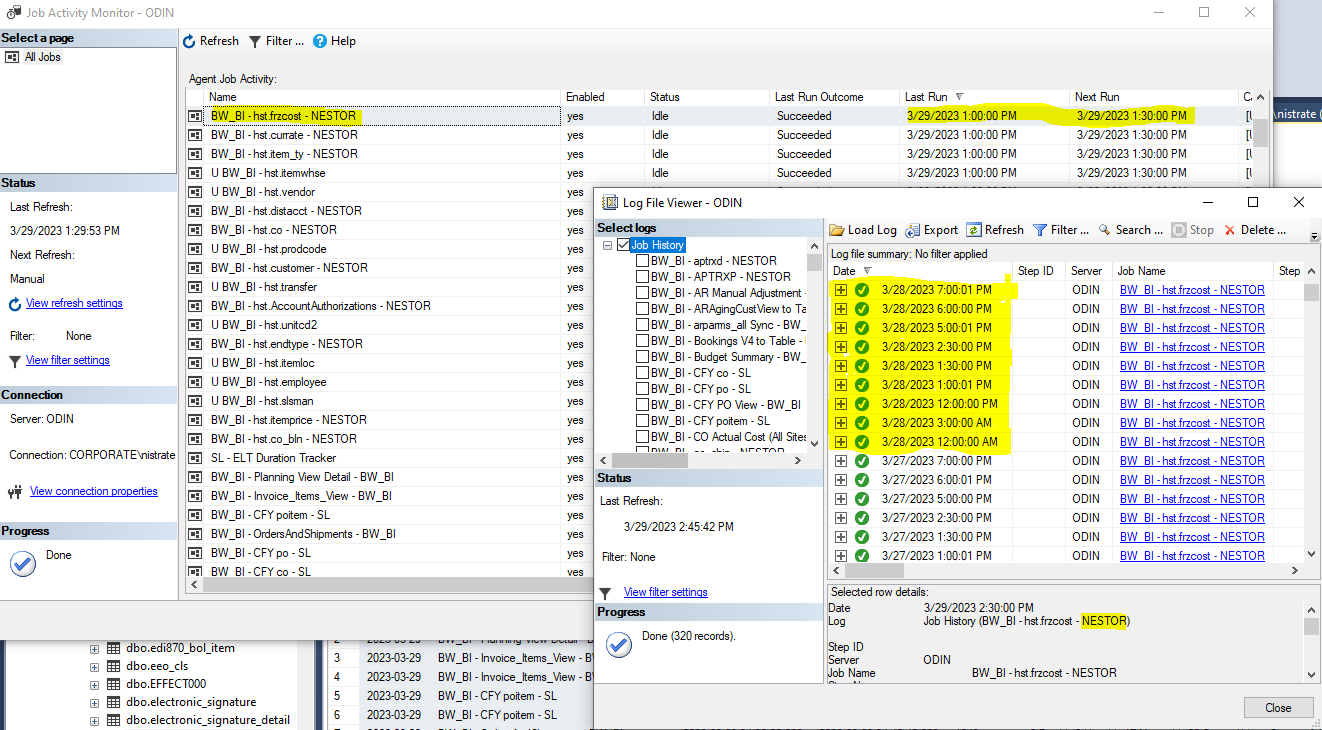

In [9]:
Image(filename='frzcost.png')

## Before looking at the histograms, I have to point out that Troy runs ETLs of ETLs. This is why we are seeing so many ETLs per day, however, this does not explain the decreasing trend from 3/1 to 3/22. 

### The histograms show how many instances of each pipelines were initiated on a given day. This data is extracted from the table Troy built to keep track of the duration for each pipeline. 

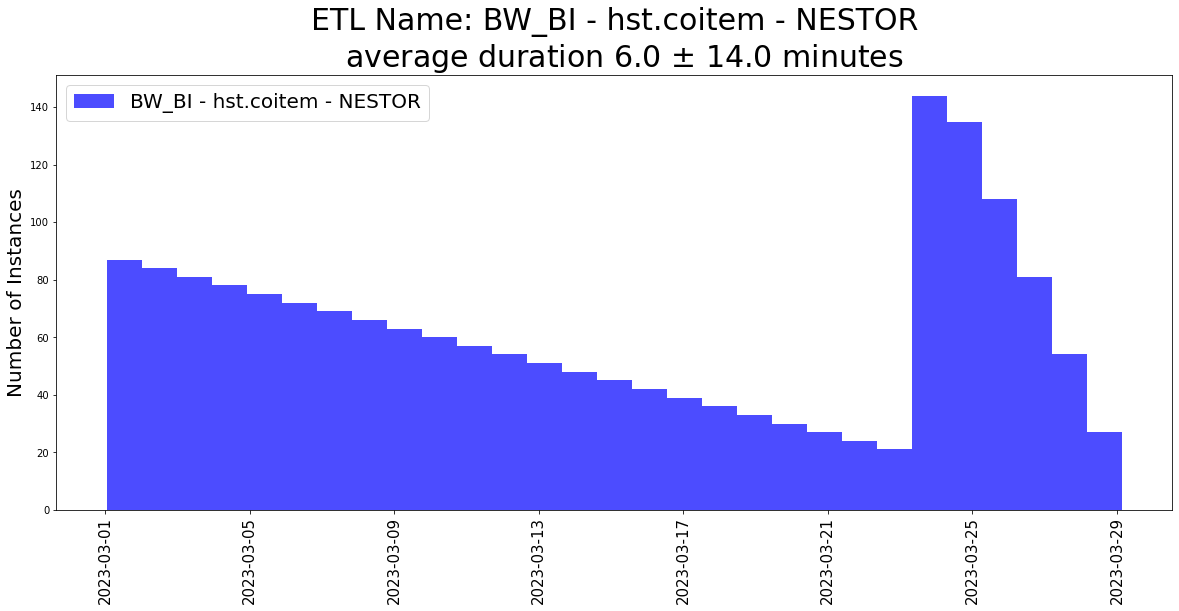

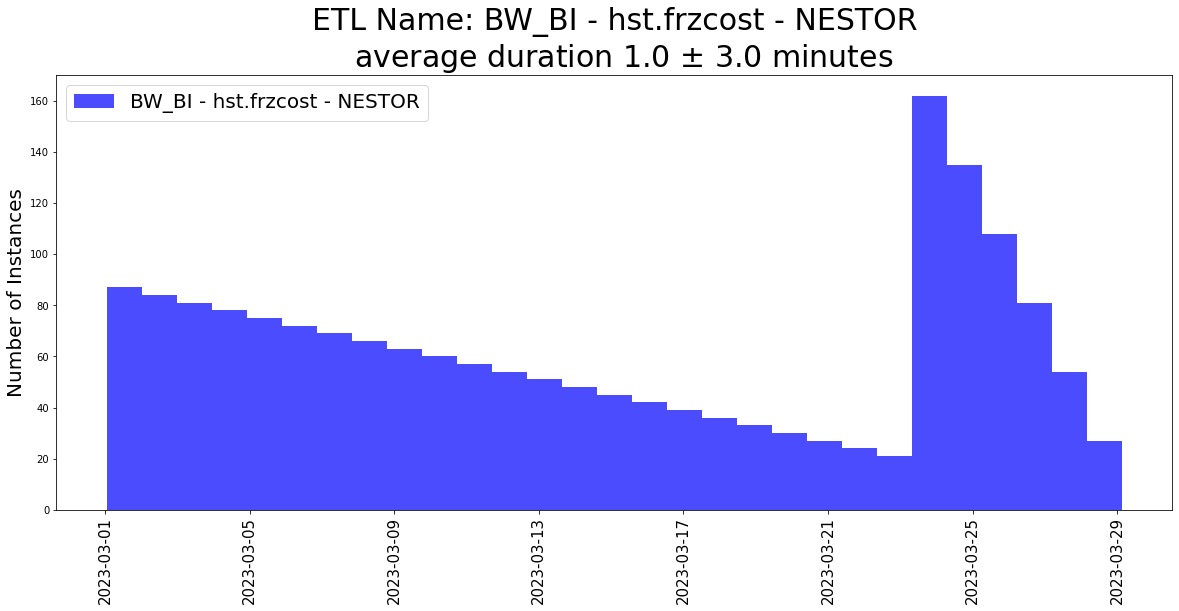

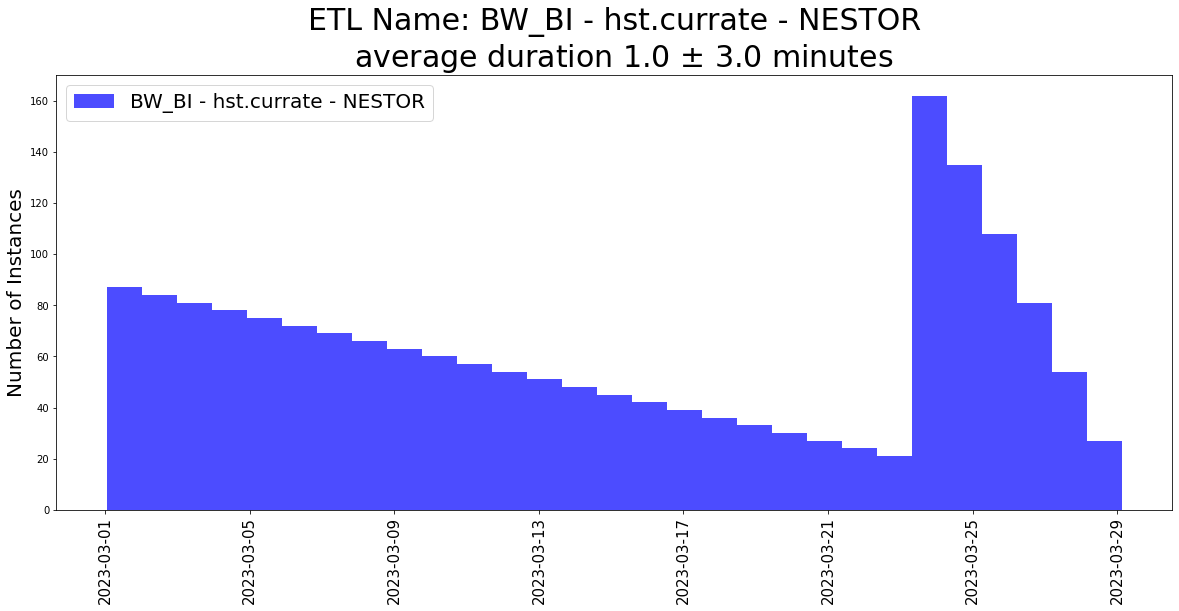

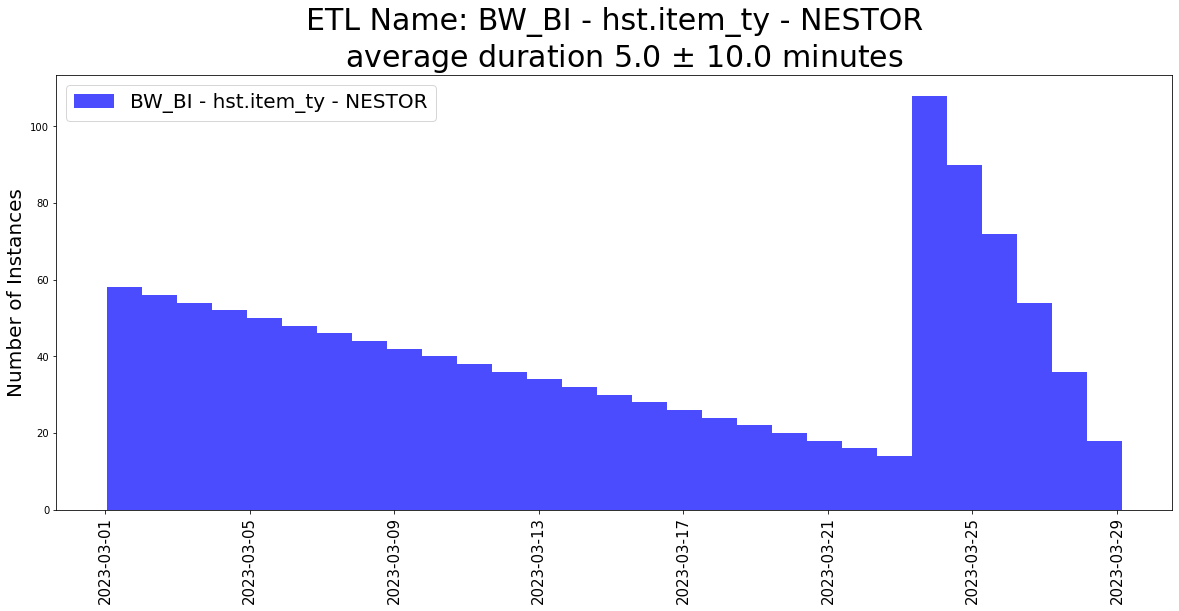

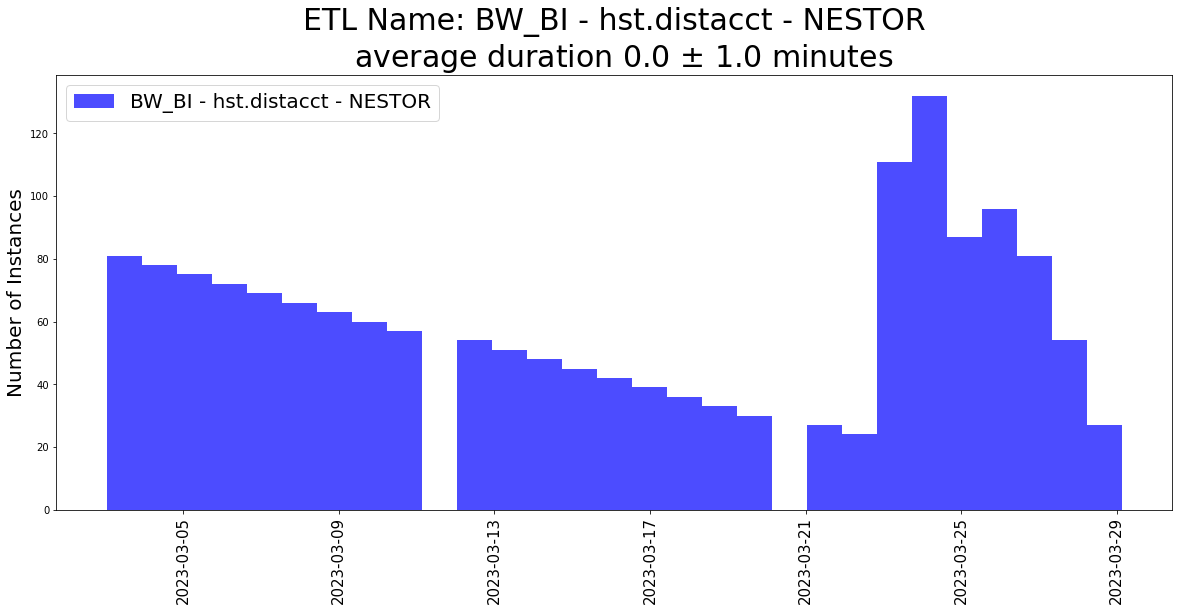

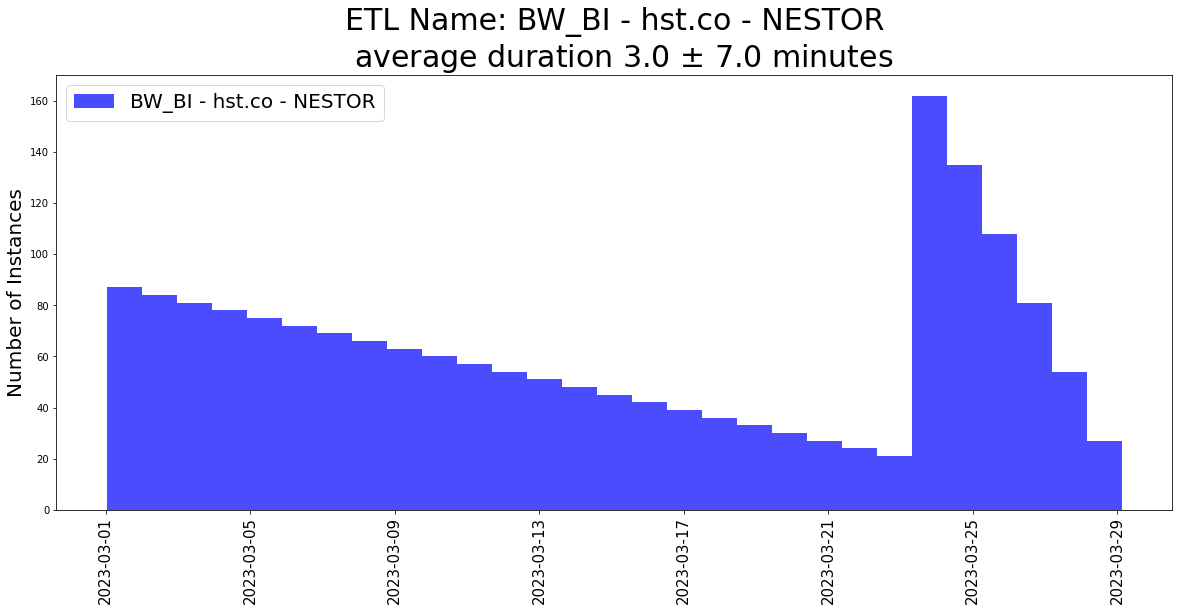

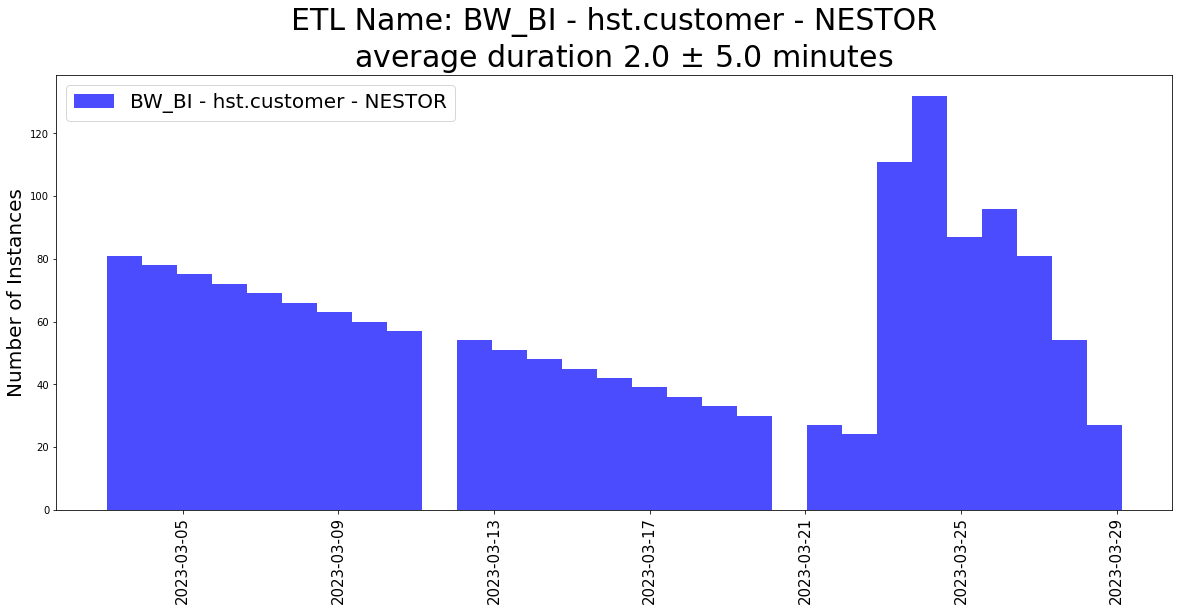

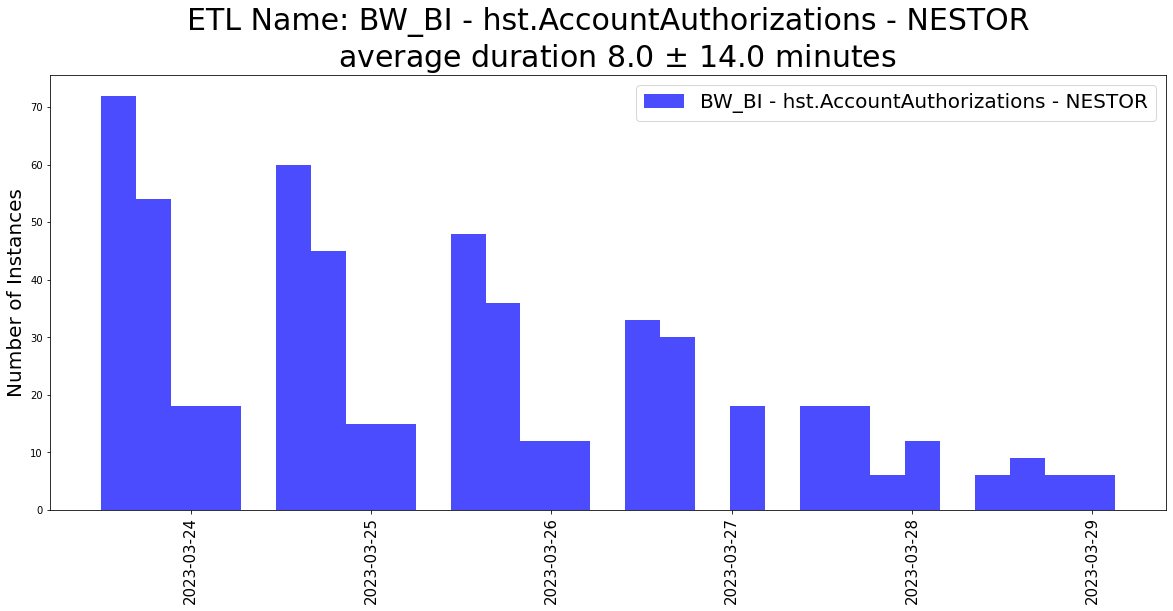

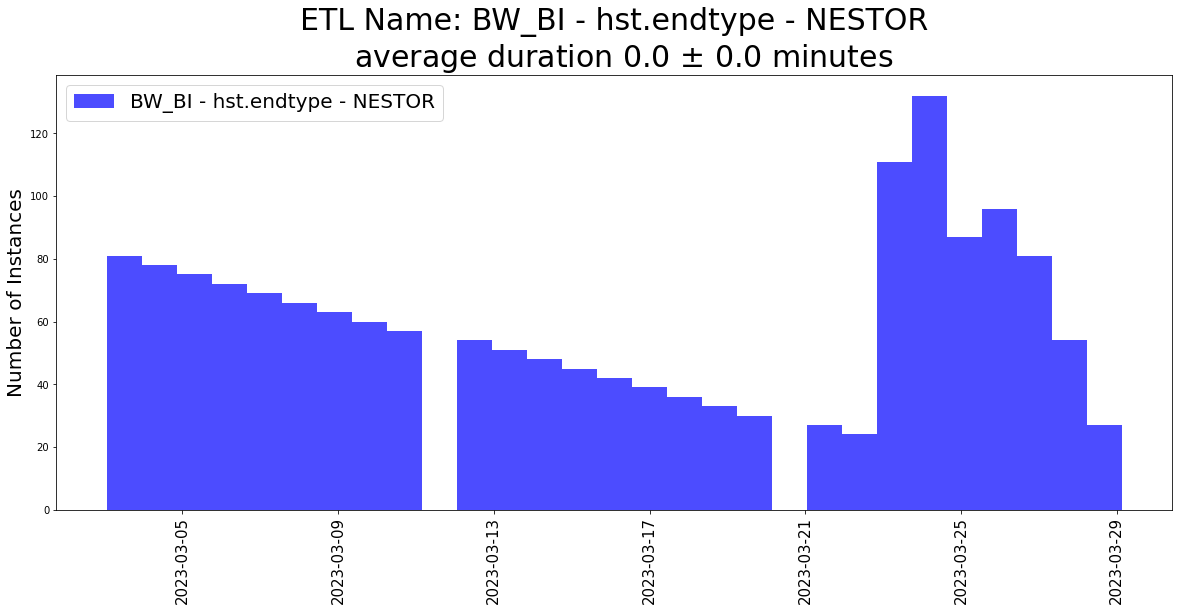

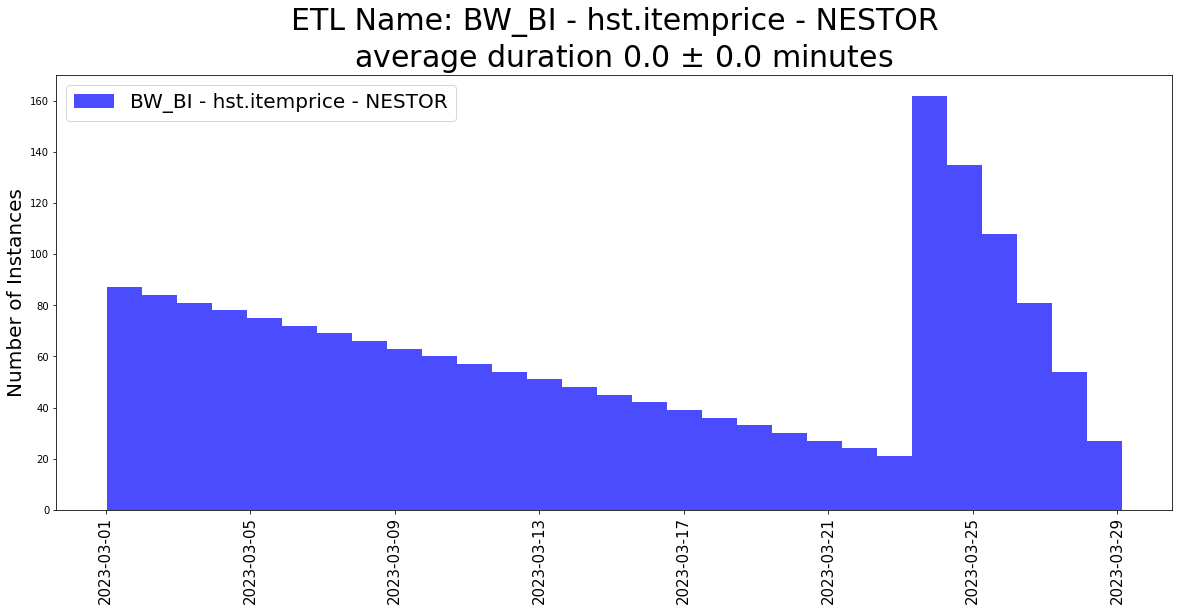

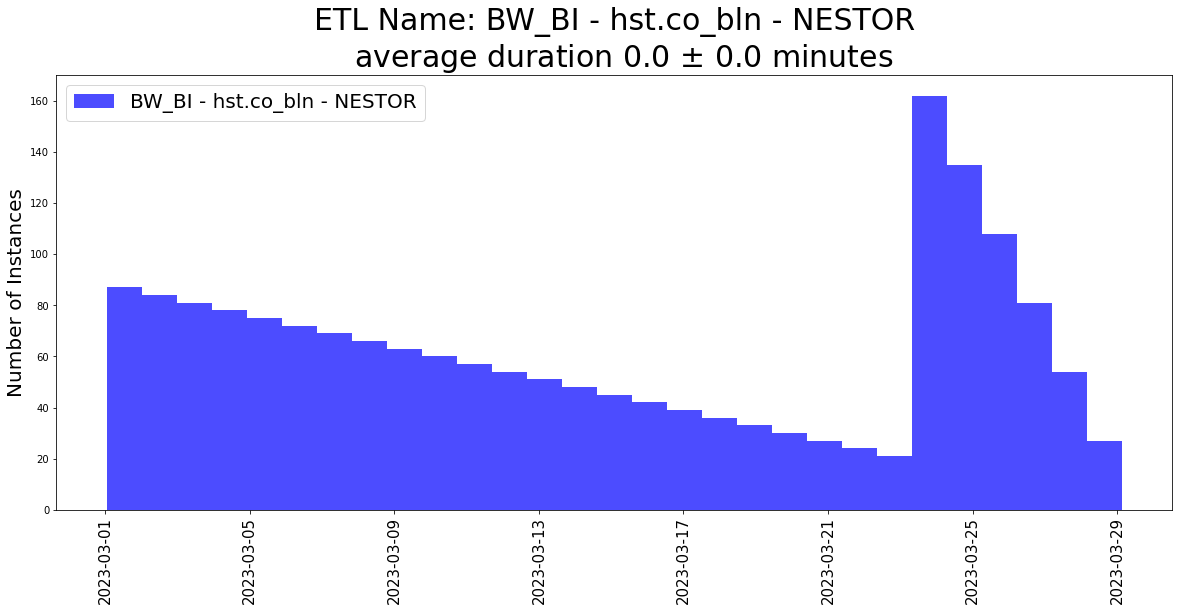

In [6]:
# Individual pipeline analysis

job_names = jobs_multiple_times_per_day['Name'].to_numpy() # list of job names on >1/day schedule
schedule = [] # will store the schedule for all the jobs for march

for name in job_names:
    schedule.append(elt_to_nestor[elt_to_nestor['ETL_name'] == name])


for idx in range(len(schedule)):
    
    avg_duration   = np.round( np.mean( schedule[idx]['run_duration'] )/60, 0) # average duration per etl    (minutes)
    stdev_duration = np.round( np.std(  schedule[idx]['run_duration'] )/60, 0) # standard deviation per etl  (minutes)
    
    plt.figure(figsize = (20, 8))

    plt.hist(schedule[idx]['Start_DateTime'], bins = 29 , label = job_names[idx], color = 'blue', alpha = 0.7)

    plt.legend(fontsize = 20)

    plt.title(f"ETL Name: {job_names[idx]}\n  average duration {avg_duration} $\pm$ {stdev_duration} minutes", fontsize = 30)
    plt.ylabel(f"Number of Instances", fontsize = 20)
    plt.xticks(rotation = 90, fontsize = 15)
    plt.yticks(fontsize = 10)

    plt.show()
